In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [70]:
number_of_points = 512
covariance = np.array([[-1.55, 4], [4, -1.55]])
mean = np.array([1, 1])
translation = np.array([3, 3])

group_adam = np.random.multivariate_normal(mean, covariance, number_of_points)
eve_shift = number_of_points - 0
group_eve = np.random.multivariate_normal(mean + translation, covariance, eve_shift)
adam_group_class = np.array(number_of_points * [1])
eve_group_class = np.array(eve_shift * [-1])

C:\Users\matip\AppData\Local\Temp\ipykernel_15392\3560622650.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  group_adam = np.random.multivariate_normal(mean, covariance, number_of_points)
C:\Users\matip\AppData\Local\Temp\ipykernel_15392\3560622650.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  group_eve = np.random.multivariate_normal(mean + translation, covariance, eve_shift)


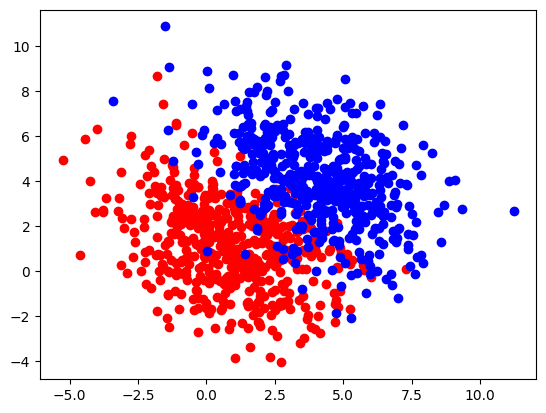

In [72]:
plt.scatter(group_adam[:, 0], group_adam[:, 1], c='r', label='Adam')
plt.scatter(group_eve[:, 0], group_eve[:, 1], c='b', label='Eve')
plt.show()

In [73]:
# merge adam and eve groups
X = np.vstack((group_adam, group_eve))
y = np.vstack((adam_group_class, eve_group_class)).reshape(-1, 1)

In [74]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42069)

In [75]:
tree_clasifier = DecisionTreeClassifier()

In [76]:
tree_clasifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred = tree_clasifier.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred)

0.8926829268292683

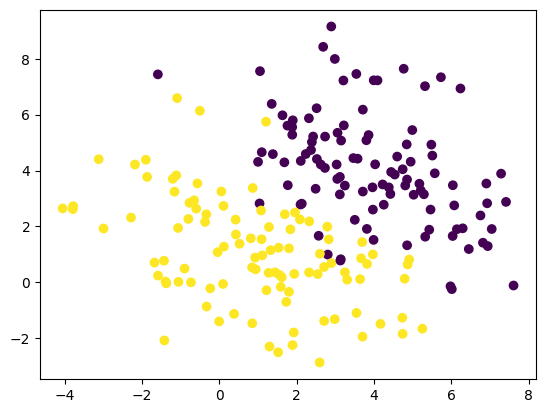

In [79]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')

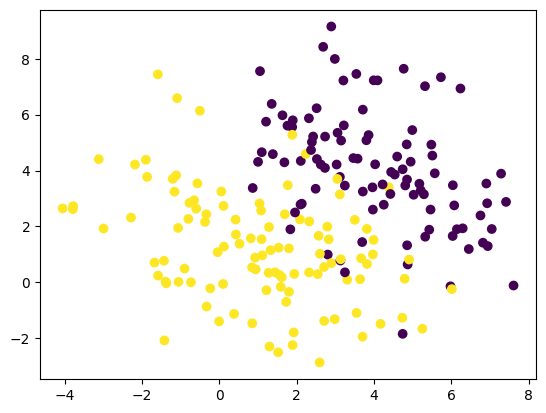

In [80]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')

## random forest

In [81]:
random_forest = RandomForestClassifier(n_estimators=400)

In [82]:
random_forest.fit(X_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=400)

In [83]:
y_pred_random_forest = random_forest.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred_random_forest)

0.8975609756097561

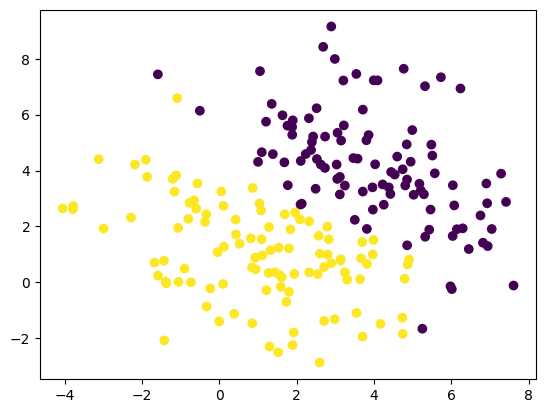

In [86]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_random_forest, cmap='viridis')

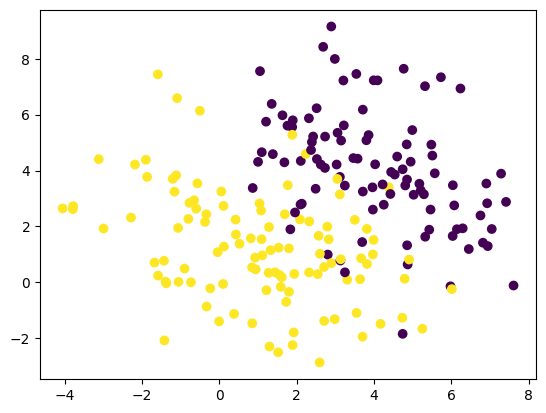

In [87]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')

## xgboost

In [90]:
xgboost_classifier = xgb.XGBClassifier(n_estimators=400)

In [94]:
y_train_adjusted = np.where(y_train < 0, 0, y_train)
y_test_adjusted = np.where(y_test < 0, 0, y_test)

In [93]:
xgboost_classifier.fit(X_train, np.ravel(y_train_adjusted))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
y_adjusted_pred = xgboost_classifier.predict(X_test)

In [96]:
accuracy_score(y_test_adjusted, y_adjusted_pred)

0.8926829268292683

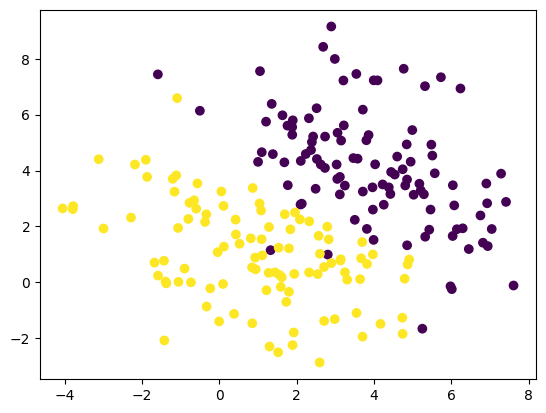

In [97]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_adjusted_pred, cmap='viridis')

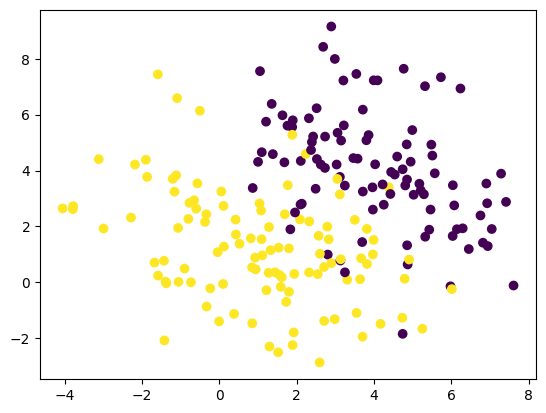

In [98]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_adjusted, cmap='viridis')

# decision tree regression

In [160]:
n = 50
x = np.linspace(-1, 1.5, n)
probability = 0.3
perturbation = np.random.choice([0, 1], n, p=[1 - probability, probability]) * np.random.normal(loc=0, scale=0.7, size=n)
y_unperturbed = 5*np.exp(-x**2) + 2 + x*(x)*np.sin(x)
y = y_unperturbed + perturbation

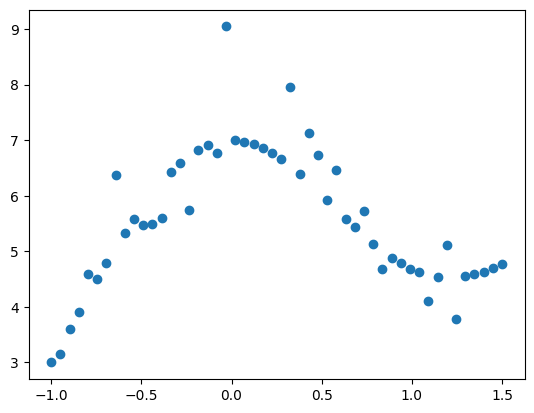

In [161]:
plt.scatter(x, y)

In [162]:
tree_regressor = DecisionTreeRegressor(max_depth=3)
overfitting_tree_regressor = DecisionTreeRegressor(max_depth=8)
forest_regressor = RandomForestRegressor(max_depth=8)

In [163]:
tree_regressor.fit(x.reshape(-1, 1), y)
overfitting_tree_regressor.fit(x.reshape(-1, 1), y)
forest_regressor.fit(x.reshape(-1, 1), y)

RandomForestRegressor(max_depth=8)

In [164]:
x_test = np.linspace(-1, 1.5, n//4)

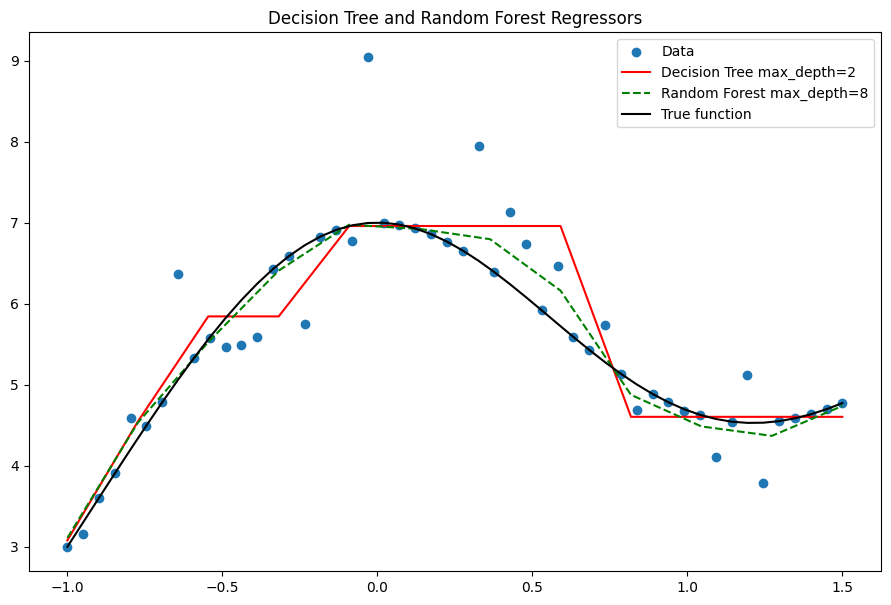

In [165]:
plt.figure(figsize=(11, 7))
plt.scatter(x, y, label='Data')
plt.plot(x_test, tree_regressor.predict(x_test.reshape(-1, 1)), 'r', label='Decision Tree max_depth=2')
# plt.plot(x, overfitting_tree_regressor.predict(x.reshape(-1, 1)), 'b', label='Decision Tree max_depth=8')
plt.plot(x_test, forest_regressor.predict(x_test.reshape(-1, 1)), 'g--', label='Random Forest max_depth=8')
plt.plot(x, y_unperturbed, 'k', label='True function')
plt.title('Decision Tree and Random Forest Regressors')
plt.legend()
plt.show()